In [ ]:
# Avocado

In [ ]:
'''
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their 
parents basements. If a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes 
directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below 
reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: 
grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) 
cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass 
avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
'''

In [ ]:
# Importing all necessary libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressorhbors

ImportError: cannot import name 'KNeighborsRegressorhbors'

In [ ]:
# Importing dataset

In [2]:
df=pd.read_csv("C://Users//acer//Desktop//1sem//python//My stuff//avocado.csv")

In [ ]:
# Looking at first few rows

In [3]:
df.head(3)

,id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [ ]:
# Looking at last few rows 

In [4]:
df.tail(3)

,id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
# Looking at the shape of dataset

In [5]:
df.shape

(18249, 14)

In [ ]:
# Looking at all columns 

In [6]:
df.columns

Index(['id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
# Looking at all column datatypes

In [7]:
df.dtypes

id                int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [ ]:
# Looking at stats value 

In [8]:
df.describe()

,id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
# Feature engineering

In [ ]:
# Lets convert columns Date into numeric for applying ml algo

In [ ]:
# before doing all these stuff we need to convert object into datetime 

In [13]:
df['Date'] = pd.to_datetime(df.Date)

In [15]:
df.Date.dt.dayofyear.head()

0    361
1    354
2    347
3    163
4    333
Name: Date, dtype: int64

In [ ]:
# Lets fetch month and day from date column and make new variable and store them

In [17]:
df['month'] = df['Date'].dt.month

In [20]:
df["day"]=df["Date"].dt.day

In [22]:
df.head(1)

,id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27


In [ ]:
# removing date column

In [24]:
df.drop("Date",axis=1,inplace=True)

In [28]:
df.dtypes

id                int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
month             int64
day               int64
dtype: object

In [ ]:
# Lets do engineering on type column

In [30]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [31]:
len(df.type.unique())

2

In [32]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [33]:
len(df.region.unique())

54

In [ ]:
data.catcol=LabelEncoder().fit_transform(data.catcol)

In [36]:
cat_feats=df.select_dtypes(include=["object"]).columns.tolist()

In [47]:
df=df.apply(LabelEncoder().fit_transform)

In [ ]:
# Lets check whether we have applied everything correctly

In [48]:
df.head(3)

,id,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0,11,26
1,1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0,11,19
2,2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0,0,11,12


In [49]:
df.dtypes

id              int64
AveragePrice    int64
Total Volume    int64
4046            int64
4225            int64
4770            int64
Total Bags      int64
Small Bags      int64
Large Bags      int64
XLarge Bags     int64
type            int32
year            int64
region          int32
month           int64
day             int64
dtype: object

In [ ]:
# Lets check for any null values in dataset

In [50]:
df.isna().sum()

id              0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

In [ ]:
# dropping duplicates

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(18249, 15)

In [ ]:
# Data Visualization

In [ ]:
# Using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179DC33B828>,
      dtype=object)

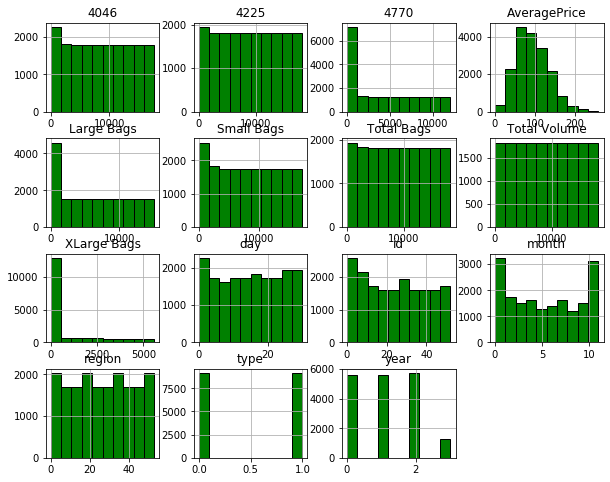

In [54]:
df.hist(figsize=(10,8),color="green",edgecolor="black")

In [ ]:
# Model building

In [ ]:
# Lets divide our data in dependent and independent variables

In [56]:
y=df["AveragePrice"]
x=df.drop("AveragePrice",axis=1)

In [ ]:
# Lets divide our data into training and testing 

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# lets look at the shpae of training and test splitted dataset

In [61]:
print("shape of x_train is :",x_train.shape)
print("shape of y_train is :",y_train.shape)
print("shape of x_test is :",x_test.shape)
print("shape of y_test is :",y_test.shape)

shape of x_train is : (12774, 14)
shape of y_train is : (12774,)
shape of x_test is : (5475, 14)
shape of y_test is : (5475,)


In [ ]:
# applying ML algo on training dataset

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [62]:
# Creating a dataframe for comparing actual vs predicted value

In [65]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual   Predicted
8604       35   71.786982
2608       50   45.110929
14581      97  114.605940
4254       50   47.366181
16588      98  100.213855
...       ...         ...
13173     117  132.040176
16853      47  109.063373
14016     205  143.306987
14802     139  126.300186
898        78   83.518456

[5475 rows x 2 columns]


In [66]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 21.5242364247595
mean sq error: 764.3219339960042
root mean sq error: 27.646372890417364
variance score: 0.53


In [69]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [71]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
8604       35       49.0
2608       50       42.0
14581      97       87.0
4254       50       49.0
16588      98       98.0
...       ...        ...
13173     117      125.0
16853      47       47.0
14016     205      199.0
14802     139      228.0
898        78       83.0

[5475 rows x 2 columns]


In [73]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 12.760365296803654
mean sq error: 386.8312328767123
root mean sq error: 19.668025647652392
variance score: 0.53


In [74]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
8604       35       40.5
2608       50       48.2
14581      97       90.4
4254       50       44.0
16588      98       98.0
...       ...        ...
13173     117      122.3
16853      47       49.9
14016     205      171.8
14802     139      154.1
898        78       78.3

[5475 rows x 2 columns]


In [76]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 10.138611872146118
mean sq error: 209.3845388127854
root mean sq error: 14.470125735901032
variance score: 0.53


In [79]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [80]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
8604       35       57.0
2608       50       56.2
14581      97       89.2
4254       50       51.4
16588      98       99.0
...       ...        ...
13173     117      131.6
16853      47      100.6
14016     205      174.4
14802     139      126.2
898        78       89.2

[5475 rows x 2 columns]


In [81]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 13.803287671232876
mean sq error: 405.7149442922374
root mean sq error: 20.142366898957963
variance score: 0.53


In [82]:
svr=SVR()
svr.fit(x_train,y_train)
prediction=svr.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
8604       35  89.836626
2608       50  89.836626
14581      97  89.836626
4254       50  89.836626
16588      98  89.836626
...       ...        ...
13173     117  89.836626
16853      47  89.836626
14016     205  89.836626
14802     139  89.836626
898        78  89.836626

[5475 rows x 2 columns]


In [84]:
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))

mean abs error: 32.23477663152751
mean sq error: 1626.9923363359442
root mean sq error: 40.33599306247392
variance score: 0.53
